# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer 
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import Normalizer
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")

%load_ext autoreload
%autoreload 2

In [5]:
df = pd.read_csv('temp_res_comp/unid_prob/rf_mode.csv' ,index_col=0)
df.index.name='name'
df 

,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J004829.5-732959,HMXB,0.415597,0.263594,0.143843,0.097607,0.415597,0.0100,0.033680,0.152003,0.109582,0.037688
2CXO J005449.0-725128,HMXB,0.454735,0.230054,0.224681,0.079088,0.454735,0.0050,0.030833,0.067647,0.078015,0.060000
2CXO J010049.1-731526,HMXB,0.596107,0.471213,0.124895,0.044431,0.596107,0.0025,0.016640,0.086987,0.102707,0.025732
2CXO J010049.8-731045,HMXB,0.420295,0.196160,0.224135,0.097568,0.420295,0.0025,0.026171,0.075192,0.095964,0.058176
2CXO J010647.7-730940,STAR,0.327500,0.115000,0.087500,0.122500,0.212500,0.0400,0.092500,0.327500,0.017500,0.100000
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.276694,0.078583,0.148236,0.147611,0.276694,0.0225,0.033056,0.106069,0.198111,0.067722
2CXO J220508.3-495935,HMXB,0.311250,0.091250,0.153125,0.220000,0.311250,0.0425,0.037500,0.083125,0.117500,0.035000
2CXO J220544.0-495505,HMXB,0.286985,0.083897,0.098640,0.203088,0.286985,0.0650,0.027500,0.123272,0.078015,0.117500


In [6]:
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


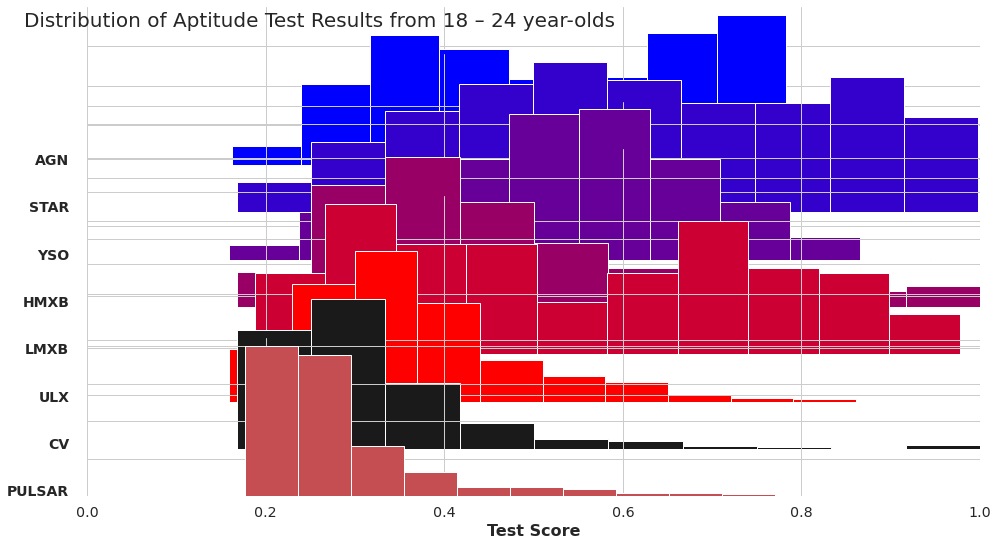

In [22]:
cl = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' , 'CV' ,'PULSAR']
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000' , 'k' , 'r']

gs = grid_spec.GridSpec(len(cl),1)
fig = plt.figure(figsize=(16,9))

i = 0

ax_objs = []
for c in cl:
    c = cl[i]
    x = np.array(df[df['class']==c]['prob'])
    #x_d = np.linspace(0,1, 1000)

    #kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    #kde.fit(x[:, None])

    #logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].hist(x,color=colors[i],lw=1)
    #ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    #ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(cl)-1:
        ax_objs[-1].set_xlabel("Test Score", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = c.replace(" ","\n")
    ax_objs[-1].text(-0.02,0,adj_country,fontweight="bold",fontsize=14,ha="right")


    i += 1

gs.update(hspace=-0.7)

fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

plt.tight_layout()
plt.show()
